In [57]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [60]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [62]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [63]:
# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key

In [64]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1944cbc39c918c9e22ecb704ec36295c


In [65]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [66]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | basqal
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | mayo
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | oussouye
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rongcheng
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | bowen
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | jalu
Processing Record 23 of S

City not found. Skipping...
Processing Record 37 of Set 4 | san cristobal
Processing Record 38 of Set 4 | lamu
Processing Record 39 of Set 4 | anzio
Processing Record 40 of Set 4 | toliary
City not found. Skipping...
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | verkhnechusovskiye gorodki
Processing Record 43 of Set 4 | chifeng
Processing Record 44 of Set 4 | tuktoyaktuk
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | mattawa
Processing Record 47 of Set 4 | boa vista
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | balabac
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | auce
Processing Record 2 of Set 5 | kadyy
Processing Record 3 of Set 5 | juneau
Processing Record 4 of Set 5 | kysyl-syr
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | santa marta
Processing Record 7 of Set 5 | shelburne
Processing Record 8 of Set 5 | joanopolis
Process

Processing Record 25 of Set 8 | abu road
Processing Record 26 of Set 8 | saurimo
Processing Record 27 of Set 8 | ayan
Processing Record 28 of Set 8 | lincoln
Processing Record 29 of Set 8 | sobolevo
Processing Record 30 of Set 8 | christchurch
Processing Record 31 of Set 8 | geraldton
Processing Record 32 of Set 8 | harlingen
Processing Record 33 of Set 8 | buchanan
Processing Record 34 of Set 8 | camacha
Processing Record 35 of Set 8 | abu samrah
Processing Record 36 of Set 8 | mahbubnagar
Processing Record 37 of Set 8 | natal
Processing Record 38 of Set 8 | port augusta
Processing Record 39 of Set 8 | la baule-escoublac
Processing Record 40 of Set 8 | hamilton
Processing Record 41 of Set 8 | launceston
Processing Record 42 of Set 8 | binghamton
Processing Record 43 of Set 8 | daru
Processing Record 44 of Set 8 | clyde river
Processing Record 45 of Set 8 | fukue
Processing Record 46 of Set 8 | siderno
Processing Record 47 of Set 8 | canmore
Processing Record 48 of Set 8 | luderitz
Pro

Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | bay roberts
Processing Record 21 of Set 12 | fort atkinson
Processing Record 22 of Set 12 | akureyri
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | haines junction
Processing Record 25 of Set 12 | elati
Processing Record 26 of Set 12 | kodinsk
Processing Record 27 of Set 12 | chicama
Processing Record 28 of Set 12 | guane
Processing Record 29 of Set 12 | kijaba
City not found. Skipping...
Processing Record 30 of Set 12 | tongzi
Processing Record 31 of Set 12 | andros town
Processing Record 32 of Set 12 | saleaula
City not found. Skipping...
Processing Record 33 of Set 12 | jutai
Processing Record 34 of Set 12 | coahuayana
Processing Record 35 of Set 12 | banff
Processing Record 36 of Set 12 | road town
Processing Record 37 of Set 12 | namatanai
Processing Record 38 of Set 12 | punta ocote
Processing Record 39 of Set 12 | rock sound
Processing Record 40 of Set 12 | arti
Processing R

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-26.16,87,100,3.78,RU,2021-01-10 22:39:06
1,Cabo San Lucas,22.8909,-109.9124,77.00,46,1,9.22,MX,2021-01-10 22:39:06
2,Yellowknife,62.4560,-114.3525,3.20,92,90,6.91,CA,2021-01-10 22:39:06
3,Portland,45.5234,-122.6762,46.99,87,90,11.50,US,2021-01-10 22:39:06
4,Cape Town,-33.9258,18.4232,66.20,63,0,18.41,ZA,2021-01-10 22:36:21
5,Bethel,41.3712,-73.4140,32.00,58,24,1.99,US,2021-01-10 22:39:07
6,Basqal,40.7552,48.3910,32.00,86,35,2.30,AZ,2021-01-10 22:39:07
7,Tasiilaq,65.6145,-37.6368,19.40,49,90,1.14,GL,2021-01-10 22:39:07
8,Mayo,38.8876,-76.5119,42.01,52,1,3.62,US,2021-01-10 22:39:07
9,Avarua,-21.2078,-159.7750,86.00,70,20,12.66,CK,2021-01-10 22:39:07


In [68]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-01-10 22:39:06,69.7008,170.3133,-26.16,87,100,3.78
1,Cabo San Lucas,MX,2021-01-10 22:39:06,22.8909,-109.9124,77.00,46,1,9.22
2,Yellowknife,CA,2021-01-10 22:39:06,62.4560,-114.3525,3.20,92,90,6.91
3,Portland,US,2021-01-10 22:39:06,45.5234,-122.6762,46.99,87,90,11.50
4,Cape Town,ZA,2021-01-10 22:36:21,-33.9258,18.4232,66.20,63,0,18.41
5,Bethel,US,2021-01-10 22:39:07,41.3712,-73.4140,32.00,58,24,1.99
6,Basqal,AZ,2021-01-10 22:39:07,40.7552,48.3910,32.00,86,35,2.30
7,Tasiilaq,GL,2021-01-10 22:39:07,65.6145,-37.6368,19.40,49,90,1.14
8,Mayo,US,2021-01-10 22:39:07,38.8876,-76.5119,42.01,52,1,3.62
9,Avarua,CK,2021-01-10 22:39:07,-21.2078,-159.7750,86.00,70,20,12.66


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

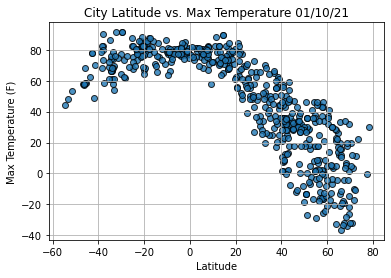

In [74]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

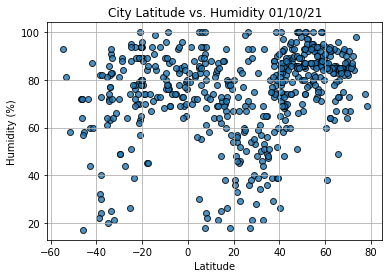

In [75]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

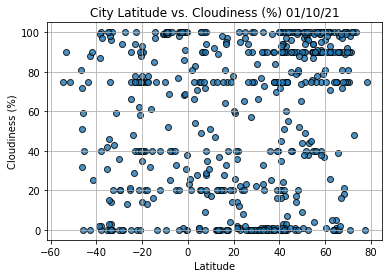

In [76]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

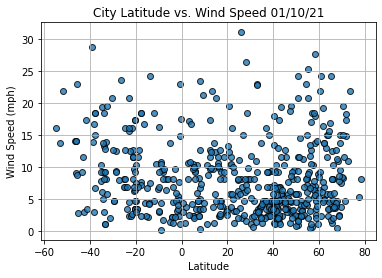

In [77]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()